In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
initial_data=pd.read_csv('Dataset\Faulty_Question_dataset.csv', encoding='latin1')

In [3]:
data = pd.read_csv('Dataset\Faulty_Question_dataset.csv', encoding='latin1')
data.head(10)

,Discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...
5,Physics,The diagram shows a uniform metre rule weighin...,This problem becomes unsolvable because it inc...,ChatGPT 4o,We will solve this problem by applying the pri...
6,Physics,A man spends 6.4 kJ energy in displacing a bod...,This problem becomes unsolvable because when t...,ChatGPT 4o-mini,"We can solve this problem in two parts: first,..."
7,Physics,It takes 20 s for person A of mass 50 kg to cl...,The problem becomes unsolvable because:\nThe v...,ChatGPT 4o-mini,To compare the power developed by persons A an...
8,Physics,A body of mass m is moving with a uniform velo...,The problem becomes unsolvable because:\nThe c...,ChatGPT 4o-mini,To determine how much work is being done by th...
9,Physics,A flexible crowbar of length 120 cm has its fu...,The problem becomes unsolvable because:\nThe f...,ChatGPT 4o-mini,To calculate the mechanical advantage of the c...


In [4]:
discipline_counts = data['Discipline'].value_counts()
physics_count = discipline_counts.get('Physics', 0)
chemistry_count = discipline_counts.get('Chemistry', 0)
print(f"Number of Physics questions: {physics_count}")
print(f"Number of Chemistry questions: {chemistry_count}")

Number of Physics questions: 75
Number of Chemistry questions: 77


In [5]:
import re
def clean_latex_response(text):
    def latex_to_text(latex_string):
        text = re.sub(r'\$.*?\$', '', latex_string)
        text = re.sub(r'\\\[.*?\\\]', '', text)
        replacements = {
            r'\\log_{10}': 'log10',
            r'\\sqrt': 'sqrt',
            r'\\frac{(.*?)}{(.*?)}': r'\1/\2',
            r'\\times': '*',
            r'\\div': '/',
            r'\\pm': '±',
            r'\\cdot': '*',
            r'\\approx': '≈',
            r'\\leq': '≤',
            r'\\geq': '≥',
            r'\\neq': '≠'
        }
        
        for latex_pattern, replacement in replacements.items():
            text = re.sub(latex_pattern, replacement, text)
        text = re.sub(r'\\[a-zA-Z]+', '', text)
        text = re.sub(r'\{|\}', '', text)
        
        return text.strip()
    
    cleaned_text = latex_to_text(str(text))
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text

data['Plain_Text_Response'] = data['Response by a top LLM'].apply(clean_latex_response)



In [6]:
data

,Discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM,Plain_Text_Response
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...,To calculate the time it takes for the man to ...
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...,The problem describes a scenario involving wav...
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...,To calculate the time it takes for the man to ...
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...,To calculate the distance between the observer...
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...,Loudness in decibels is related to the **inten...
...,...,...,...,...,...,...
147,Physics,The work function for the following metals is ...,The premise creates multiple impossibilities:\...,ChatGPT 4o-mini,To determine which metals will not give photoe...,To determine which metals will not give photoe...
148,Physics,One end of A 20 cm long tube is closed. Find t...,The premise creates multiple impossibilities:\...,ChatGPT 4o-mini,Let's break down the problem into steps.\n\n##...,Let's break down the problem into steps. ### 1...
149,Physics,An electric heater supplies heat to a system a...,The premise creates multiple impossibilities:\...,ChatGPT 4o-mini,To solve for the rate at which the internal en...,To solve for the rate at which the internal en...
150,Physics,A steam engine delivers 5.4×108 J of work per ...,The premise creates multiple impossibilities:\...,ChatGPT 4o-mini,To calculate the efficiency of the steam engin...,To calculate the efficiency of the steam engin...


In [7]:
def analyze_sentence_lengths(df):
    def calculate_sentence_length(text):
        if pd.isna(text):
            return 0
        return len(text.split())
    
    data['Question_Length'] = data['Question'].apply(calculate_sentence_length)
    data['Response_Length'] = data['Response by a top LLM'].apply(calculate_sentence_length)
    
    # Calculate averages by discipline
    disciplines = ['Physics', 'Chemistry']
    results = {}
    
    for discipline in disciplines:
        discipline_data = df[df['Discipline'] == discipline]
        results[discipline] = {
            'avg_question_length': discipline_data['Question_Length'].mean(),
            'avg_response_length': discipline_data['Response_Length'].mean()
        }
    
    # Visualization
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    disciplines_list = list(results.keys())
    question_lengths = [results[d]['avg_question_length'] for d in disciplines_list]
    response_lengths = [results[d]['avg_response_length'] for d in disciplines_list]
    
    ax1.bar(disciplines_list, question_lengths)
    ax1.set_title('Average Question Length')
    ax1.set_ylabel('Words')
    
    ax2.bar(disciplines_list, response_lengths)
    ax2.set_title('Average Response Length')
    ax2.set_ylabel('Words')
    
    plt.tight_layout()
    plt.show()
    
    return results

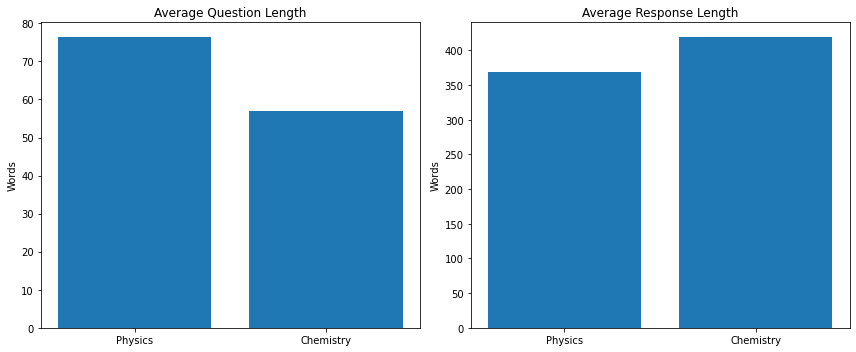

{'Physics': {'avg_question_length': 76.44, 'avg_response_length': 368.5466666666667}, 'Chemistry': {'avg_question_length': 57.02597402597402, 'avg_response_length': 419.4155844155844}}


In [8]:
results = analyze_sentence_lengths(data)
print(results)

In [9]:
data.head()

,Discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM,Plain_Text_Response,Question_Length,Response_Length
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...,To calculate the time it takes for the man to ...,32,171
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...,The problem describes a scenario involving wav...,46,265
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...,To calculate the time it takes for the man to ...,23,150
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...,To calculate the distance between the observer...,59,266
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...,Loudness in decibels is related to the **inten...,25,216


In [10]:
from textblob import TextBlob

# Perform sentiment analysis on the 'Response by a top LLM' column
def analyze_sentiment(text):
    if pd.isna(text):
        return None, None
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis
data['Polarity'], data['Subjectivity'] = zip(*data['Response by a top LLM'].apply(analyze_sentiment))

# Display the sentiment analysis results
data[['Discipline', 'Polarity', 'Subjectivity']].head()


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Discipline,Polarity,Subjectivity
0,Physics,0.076923,0.400000
1,Physics,-0.061157,0.270799
2,Physics,0.160000,0.445000
3,Physics,0.064722,0.506944
4,Physics,0.047934,0.695041


In [11]:
average_sentiment = data.groupby('Discipline')[['Polarity', 'Subjectivity']].mean().reset_index()
print(average_sentiment)

  Discipline  Polarity  Subjectivity
0  Chemistry -0.024660      0.591122
1    Physics -0.016802      0.445194


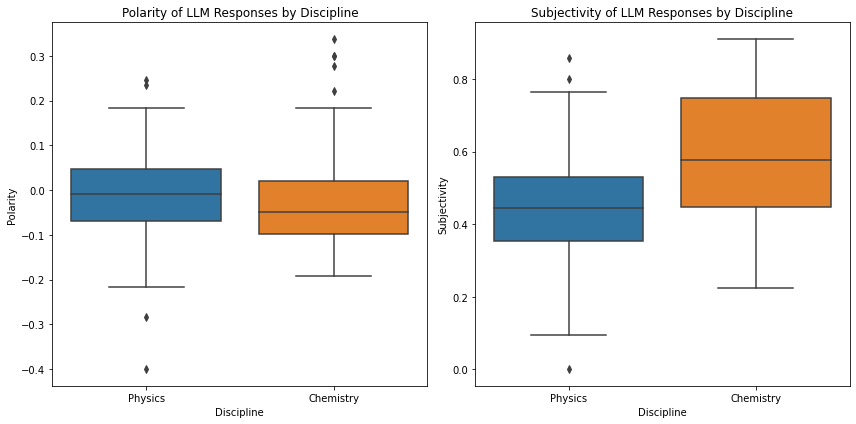

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data by discipline
disciplines = data['Discipline'].unique()

# Create a boxplot for polarity and subjectivity by discipline
plt.figure(figsize=(12, 6))

# Polarity plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Discipline', y='Polarity', data=data)
plt.title('Polarity of LLM Responses by Discipline')
plt.ylabel('Polarity')
plt.xlabel('Discipline')

# Subjectivity plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Discipline', y='Subjectivity', data=data)
plt.title('Subjectivity of LLM Responses by Discipline')
plt.ylabel('Subjectivity')
plt.xlabel('Discipline')

plt.tight_layout()
plt.show()


In [18]:
data.head()

,discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM,question_confidence,response_confidence,uncertainty_density,polarity,subjectivity
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...,30.972222,23.384615,0.011696,0.076923,0.400000
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...,30.000000,26.157025,0.003774,-0.061157,0.270799
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...,70.000000,27.850000,0.006667,0.160000,0.445000
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...,38.000000,19.322222,0.003759,0.064722,0.506944
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...,26.250000,12.504132,0.004630,0.047934,0.695041


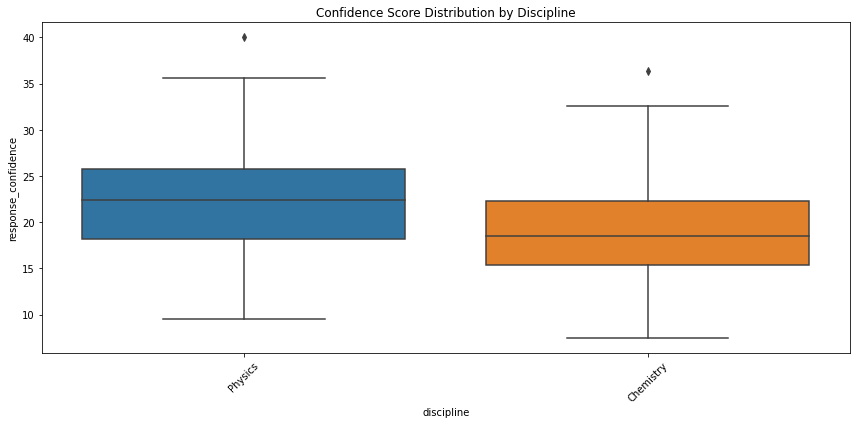

In [20]:
from collections import defaultdict

class ConfidenceAnalyzer:
    def __init__(self):
        # Uncertainty markers based on linguistic patterns
        self.uncertainty_markers = {
            'modal_verbs': ['may', 'might', 'could', 'can', 'would', 'should'],
            'hedge_words': ['probably', 'possibly', 'perhaps', 'seems', 'appears'],
            'uncertainty_verbs': ['suggest', 'suppose', 'suspect', 'presume'],
            'uncertainty_adverbs': ['roughly', 'approximately', 'generally', 'usually']
        }
    
    def calculate_confidence_score(self, text):
        blob = TextBlob(str(text))
        
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        # Combined confidence score (weighted average)
        confidence_score = (0.7 * abs(polarity) + 0.3 * (1 - subjectivity)) * 100
        
        return {
            'polarity': polarity,
            'subjectivity': subjectivity,
            'confidence_score': confidence_score
        }
    
    def analyze_uncertainty_patterns(self, text):
        text = text.lower()
        uncertainty_counts = defaultdict(int)
        
        # Count uncertainty markers
        for category, markers in self.uncertainty_markers.items():
            for marker in markers:
                uncertainty_counts[category] += len(re.findall(r'\b' + marker + r'\b', text))
        
        # Calculate uncertainty score
        total_markers = sum(uncertainty_counts.values())
        words = len(text.split())
        uncertainty_density = (total_markers / words) if words > 0 else 0
        
        return {
            'uncertainty_markers': dict(uncertainty_counts),
            'uncertainty_density': uncertainty_density
        }

def analyze_dataset(df):
    analyzer = ConfidenceAnalyzer()
    results = []
    
    for _, row in df.iterrows():
        # Analyze question and response
        question_conf = analyzer.calculate_confidence_score(row['Question'])
        response_conf = analyzer.calculate_confidence_score(row['Response by a top LLM'])
        uncertainty = analyzer.analyze_uncertainty_patterns(row['Response by a top LLM'])
        
        result = {
            'discipline': row['discipline'],
            'Question':row['Question'],
            'Reason you think it is faulty':row['Reason you think it is faulty'],
            'Which LLM you tried':row['Which LLM you tried'],
            'Response by a top LLM':row['Response by a top LLM'],
            'question_confidence': question_conf['confidence_score'],
            'response_confidence': response_conf['confidence_score'],
            'uncertainty_density': uncertainty['uncertainty_density'],
            'polarity': response_conf['polarity'],
            'subjectivity': response_conf['subjectivity']
        }
        results.append(result)
    
    return pd.DataFrame(results)

# Visualization function
def visualize_confidence_patterns(results_df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 6))
    
    # Plot confidence distributions by discipline
    sns.boxplot(x='discipline', y='response_confidence', data=results_df)
    plt.title('Confidence Score Distribution by Discipline')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

results = analyze_dataset(data)
visualize_confidence_patterns(results)


In [21]:
results.head()

,discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM,question_confidence,response_confidence,uncertainty_density,polarity,subjectivity
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...,30.972222,23.384615,0.011696,0.076923,0.400000
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...,30.000000,26.157025,0.003774,-0.061157,0.270799
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...,70.000000,27.850000,0.006667,0.160000,0.445000
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...,38.000000,19.322222,0.003759,0.064722,0.506944
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...,26.250000,12.504132,0.004630,0.047934,0.695041


In [22]:
average_confidence = results.groupby('discipline')[['question_confidence','response_confidence', 'uncertainty_density']].mean().reset_index()
print(average_confidence)

  discipline  question_confidence  response_confidence  uncertainty_density
0  Chemistry            24.589721            19.058245             0.004550
1    Physics            29.226671            22.500585             0.007095


In [26]:
# Find the top 5 questions with the most question confidence in each discipline
top_question_confidence = results.loc[results.groupby('discipline')['question_confidence'].idxmax()].nlargest(5, 'question_confidence')

# Find the top 5 questions with the least question confidence in each discipline
least_question_confidence = results.loc[results.groupby('discipline')['question_confidence'].idxmin()].nsmallest(5, 'question_confidence')

# Find the top 5 questions with the most response confidence in each discipline
top_response_confidence = results.loc[results.groupby('discipline')['response_confidence'].idxmax()].nlargest(5, 'response_confidence')

# Find the top 5 questions with the least response confidence in each discipline
least_response_confidence = results.loc[results.groupby('discipline')['response_confidence'].idxmin()].nsmallest(5, 'response_confidence')

# Display the results
print("Top 5 Questions with Most Question Confidence:")
print(top_question_confidence[['discipline', 'question_confidence', 'Question']])

print("\nTop 5 Questions with Least Question Confidence:")
print(least_question_confidence[['discipline', 'question_confidence', 'Question']])

print("\nTop 5 Questions with Most Response Confidence:")
print(top_response_confidence[['discipline', 'response_confidence', 'Response by a top LLM']])

print("\nTop 5 Questions with Least Response Confidence:")
print(least_response_confidence[['discipline', 'response_confidence', 'Response by a top LLM']])

Top 5 Questions with Most Question Confidence:
   discipline  question_confidence  \
2     Physics                 70.0   
72  Chemistry                 41.5   

                                             Question  
2   A man standing 48 m away from a perfectly soun...  
72  34.05 mL of phosphorus vapour weighs 0.0625 g ...  

Top 5 Questions with Least Question Confidence:
    discipline  question_confidence  \
42   Chemistry                 0.00   
145    Physics                 5.25   

                                              Question  
42   From tetrahedral geometry, another possible ge...  
145  An electron gun with its collector at a potent...  

Top 5 Questions with Most Response Confidence:
   discipline  response_confidence  \
39    Physics            40.000000   
64  Chemistry            36.416667   

                                Response by a top LLM  
39  1. **Kinetic energy to velocity relation:**  \...  
64  Step 1: Relate density to molecular mass\nThe ...  



In [33]:
results['confidence_difference'] = abs(results['question_confidence'] - results['response_confidence'])
final_confidence_df = pd.DataFrame()
for discipline in results['discipline'].unique():
    discipline_data = results[results['discipline'] == discipline]
    top_confidence_with_least_response = discipline_data.nlargest(5, 'question_confidence').nsmallest(5, 'response_confidence')
    final_confidence_df = pd.concat([final_confidence_df, top_confidence_with_least_response], ignore_index=True)
final_confidence_df = final_confidence_df[['discipline', 'question_confidence', 'response_confidence', 'Question','Response by a top LLM']]

final_confidence_df.to_csv('top_questions_confidence_5.csv', index=False)


In [35]:
least_response_confidence_df = pd.DataFrame()

for discipline in results['discipline'].unique():
    discipline_data = results[results['discipline'] == discipline] 
    least_response_confidence = discipline_data.nsmallest(5, 'response_confidence') 
    least_response_confidence_df = pd.concat([least_response_confidence_df, least_response_confidence], ignore_index=True)

least_response_confidence_df = least_response_confidence_df[['discipline', 'question_confidence', 'response_confidence', 'Question','Response by a top LLM']]
least_response_confidence_df.to_csv('least_response_confidence_questions.csv', index=False)


In [36]:
most_response_confidence_df = pd.DataFrame()

for discipline in results['discipline'].unique():
    discipline_data = results[results['discipline'] == discipline]
    most_response_confidence = discipline_data.nlargest(5, 'response_confidence')
    most_response_confidence_df = pd.concat([most_response_confidence_df, most_response_confidence], ignore_index=True)

most_response_confidence_df = most_response_confidence_df[['discipline', 'question_confidence', 'response_confidence', 'Question','Response by a top LLM']]
most_response_confidence_df.to_csv('most_response_confidence_questions.csv', index=False)


In [37]:
results.head()

,discipline,Question,Reason you think it is faulty,Which LLM you tried,Response by a top LLM,question_confidence,response_confidence,uncertainty_density,polarity,subjectivity,confidence_difference
0,Physics,A man is standing at a distance of 12m from a ...,Sound cannot travel in a vacuum since it requi...,ChatGPT 4o-mini,To calculate the time it takes for the man to ...,30.972222,23.384615,0.011696,0.076923,0.400000,7.587607
1,Physics,The wavelength of waves produced on the surfac...,"Wave velocity being ""in the opposite direction...",ChatGPT 4o-mini,The problem describes a scenario involving wav...,30.000000,26.157025,0.003774,-0.061157,0.270799,3.842975
2,Physics,A man standing 48 m away from a perfectly soun...,"A perfectly sound-absorbing wall, by definitio...",ChatGPT 4o,To calculate the time it takes for the man to ...,70.000000,27.850000,0.006667,0.160000,0.445000,42.150000
3,Physics,A pendulum has a frequency of 5 vibrations per...,This modified problem is unsolvable because:\n...,ChatGPT 4o,To calculate the distance between the observer...,38.000000,19.322222,0.003759,0.064722,0.506944,18.677778
4,Physics,Two waves of the same pitch have amplitudes in...,"Sound levels cannot be measured below 0 dB, as...",ChatGPT 4o,Loudness in decibels is related to the **inten...,26.250000,12.504132,0.004630,0.047934,0.695041,13.745868


### Identify common misconceptions

In [43]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('Dataset\Faulty_Question_dataset.csv', encoding='latin1')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    if pd.isna(text):
        return ''
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Cleaned_Question'] = df['Question'].apply(remove_stop_words)
df['Cleaned_Response'] = df['Response by a top LLM'].apply(remove_stop_words)
df['Cleaned_Reason'] = df['Reason you think it is faulty'].apply(remove_stop_words)

df[['Discipline', 'Cleaned_Question', 'Cleaned_Response','Cleaned_Reason']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Discipline,Cleaned_Question,Cleaned_Response,Cleaned_Reason
0,Physics,man standing distance 12m cliff vacuum . hears...,"calculate time takes man hear echo , need cons...",Sound travel vacuum since requires medium prop...
1,Physics,wavelength waves produced surface water -20cm ...,problem describes scenario involving waves sur...,Wave velocity `` opposite direction wave propa...
2,Physics,man standing 48 away perfectly sound-absorbing...,"calculate time takes man hear echo , consider ...","perfectly sound-absorbing wall , definition , ..."
3,Physics,pendulum frequency 5 vibrations per second . o...,"calculate distance observer cliff , use inform...",modified problem unsolvable : continuously cha...
4,Physics,Two waves pitch amplitudes ratio -1 : -3 . rat...,Loudness decibels related * * intensity * * so...,"Sound levels measured 0 dB , represents thresh..."


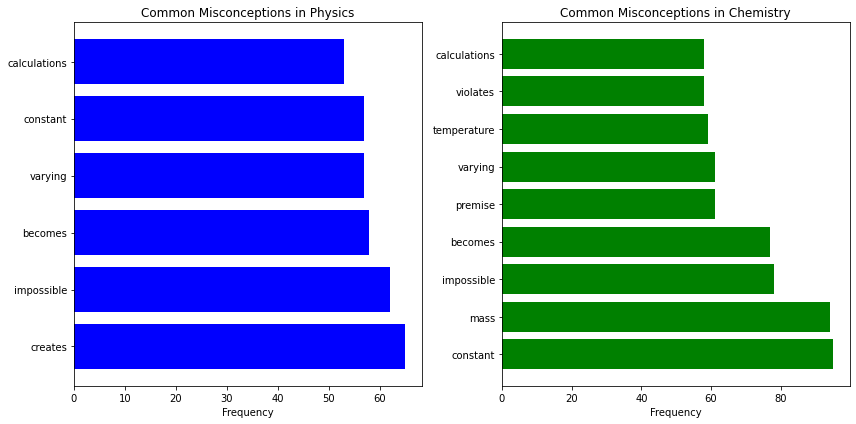

([('creates', 65),
  ('impossible', 62),
  ('becomes', 58),
  ('varying', 57),
  ('constant', 57),
  ('calculations', 53)],
 [('constant', 95),
  ('mass', 94),
  ('impossible', 78),
  ('becomes', 77),
  ('premise', 61),
  ('varying', 61),
  ('temperature', 59),
  ('violates', 58),
  ('calculations', 58)])

In [48]:
from collections import Counter
# Filter data by discipline
df_physics = df[df['Discipline'] == 'Physics']
df_chemistry = df[df['Discipline'] == 'Chemistry']

# Function to extract common words (misconceptions)
def get_common_words(text_series, top_n=10):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Function to clean misconceptions
def clean_misconceptions(misconceptions):
    symbols_to_remove = {':', '(', ')', ','}

    return [(word, count) for word, count in misconceptions if word not in symbols_to_remove]


physics_misconceptions = clean_misconceptions(get_common_words(df_physics['Cleaned_Reason']))
chemistry_misconceptions = clean_misconceptions(get_common_words(df_chemistry['Cleaned_Reason']))

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Physics plot
physics_words, physics_counts = zip(*physics_misconceptions)
axes[0].barh(physics_words, physics_counts, color='blue')
axes[0].set_title('Common Misconceptions in Physics')
axes[0].set_xlabel('Frequency')

# Chemistry plot
chemistry_words, chemistry_counts = zip(*chemistry_misconceptions)
axes[1].barh(chemistry_words, chemistry_counts, color='green')
axes[1].set_title('Common Misconceptions in Chemistry')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

physics_misconceptions, chemistry_misconceptions


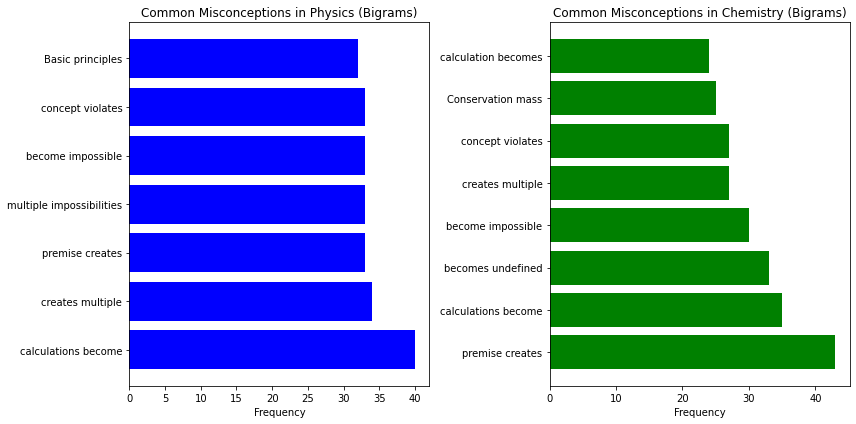

Physics Misconceptions (Bigrams): [('calculations become', 40), ('creates multiple', 34), ('premise creates', 33), ('multiple impossibilities', 33), ('become impossible', 33), ('concept violates', 33), ('Basic principles', 32)]
Chemistry Misconceptions (Bigrams): [('premise creates', 43), ('calculations become', 35), ('becomes undefined', 33), ('become impossible', 30), ('creates multiple', 27), ('concept violates', 27), ('Conservation mass', 25), ('calculation becomes', 24)]


In [56]:
from nltk import ngrams
def get_common_bigrams(text_series, top_n=10):
    all_words = ' '.join(text_series).split()
    bigrams = ngrams(all_words, 2)  
    bigram_counts = Counter(bigrams)
    return bigram_counts.most_common(top_n)

physics_misconceptions_2 = clean_misconceptions(get_common_bigrams(df_physics['Cleaned_Reason']))
chemistry_misconceptions_2 = clean_misconceptions(get_common_bigrams(df_chemistry['Cleaned_Reason']))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Physics plot
physics_bigrams_2, physics_counts = zip(*physics_misconceptions_2)
axes[0].barh(physics_bigrams_2, physics_counts, color='blue')
axes[0].set_title('Common Misconceptions in Physics (Bigrams)')
axes[0].set_xlabel('Frequency')

# Chemistry plot
chemistry_bigrams_2, chemistry_counts = zip(*chemistry_misconceptions_2)
axes[1].barh(chemistry_bigrams_2, chemistry_counts, color='green')
axes[1].set_title('Common Misconceptions in Chemistry (Bigrams)')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# Display the misconceptions
print("Physics Misconceptions (Bigrams):", physics_misconceptions_2)
print("Chemistry Misconceptions (Bigrams):", chemistry_misconceptions_2)

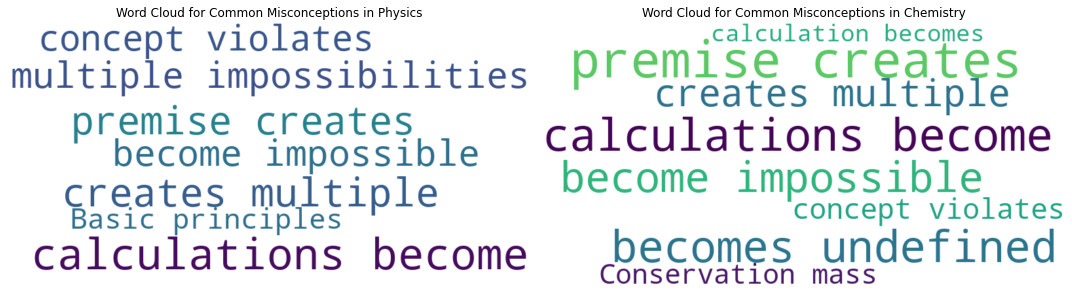

In [63]:
from wordcloud import WordCloud
physics_misconceptions_dict = dict(physics_misconceptions_2)
chemistry_misconceptions_dict = dict(chemistry_misconceptions_2)
physics_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(physics_misconceptions_dict)
chemistry_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(chemistry_misconceptions_dict)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Physics word cloud
axes[0].imshow(physics_wordcloud, interpolation='bilinear')
axes[0].axis('off')  # Hide axes
axes[0].set_title('Word Cloud for Common Misconceptions in Physics')

# Chemistry word cloud
axes[1].imshow(chemistry_wordcloud, interpolation='bilinear')
axes[1].axis('off')  # Hide axes
axes[1].set_title('Word Cloud for Common Misconceptions in Chemistry')

plt.tight_layout()
plt.show()

## Technical jargon density and response confidence


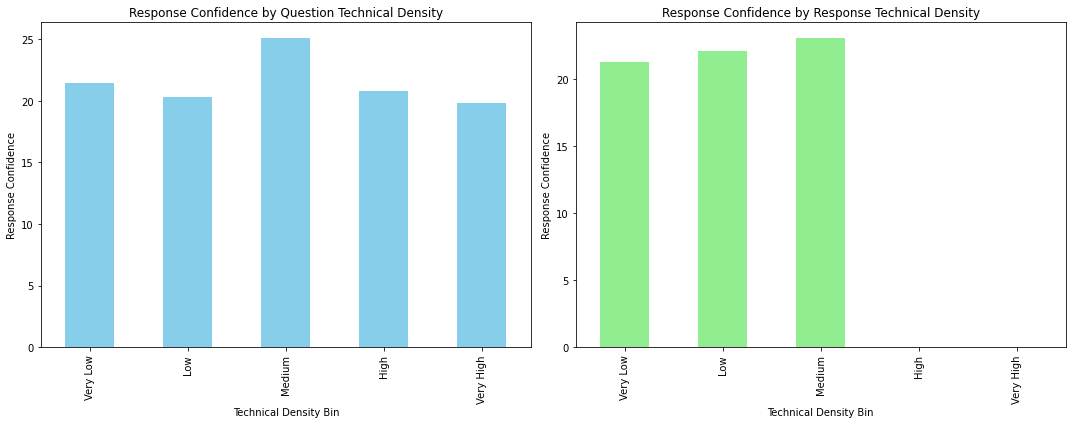

In [59]:
from scipy import stats

def analyze_technical_density_confidence(df):
    technical_terms = {
        'physics': ["constant", "mass", "energy", "temperature", "frequency", 
                   "wavelength", "velocity", "force", "momentum", "acceleration"],
        'chemistry': ["pressure", "equilibrium", "reaction", "entropy", "enthalpy",
                     "concentration", "molecule", "solution", "acid", "base"]
    }
    
    def calculate_technical_density(text, discipline):
        if pd.isna(text):
            return 0
        words = str(text).lower().split()
        tech_count = sum(1 for word in words 
                        if word in technical_terms[discipline.lower()])
        return tech_count / len(words) if words else 0
    
    # Calculate technical density for both questions and responses
    df['Question_Technical_Density'] = df.apply(
        lambda x: calculate_technical_density(x['Question'], x['discipline']), 
        axis=1
    )
    
    df['Response_Technical_Density'] = df.apply(
        lambda x: calculate_technical_density(x['Response by a top LLM'], x['discipline']), 
        axis=1
    )
    
    bins = [0, 0.02, 0.04, 0.06, 0.08, 1.0]
    labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    
    df['Question_Density_Category'] = pd.cut(df['Question_Technical_Density'], 
                                           bins=bins, 
                                           labels=labels)
    
    df['Response_Density_Category'] = pd.cut(df['Response_Technical_Density'], 
                                           bins=bins, 
                                           labels=labels)
    
    # Calculate average confidence by density category
    confidence_by_question_density = df.groupby('Question_Density_Category')['response_confidence'].mean()
    confidence_by_response_density = df.groupby('Response_Density_Category')['response_confidence'].mean()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    confidence_by_question_density.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Response Confidence by Question Technical Density')
    ax1.set_xlabel('Technical Density Bin')
    ax1.set_ylabel('Response Confidence')
    
    confidence_by_response_density.plot(kind='bar', ax=ax2, color='lightgreen')
    ax2.set_title('Response Confidence by Response Technical Density')
    ax2.set_xlabel('Technical Density Bin')
    ax2.set_ylabel('Response Confidence')
    
    plt.tight_layout()
    
    return confidence_by_question_density, confidence_by_response_density

question_confidence, response_confidence = analyze_technical_density_confidence(data)


### Keyword Combination Effects

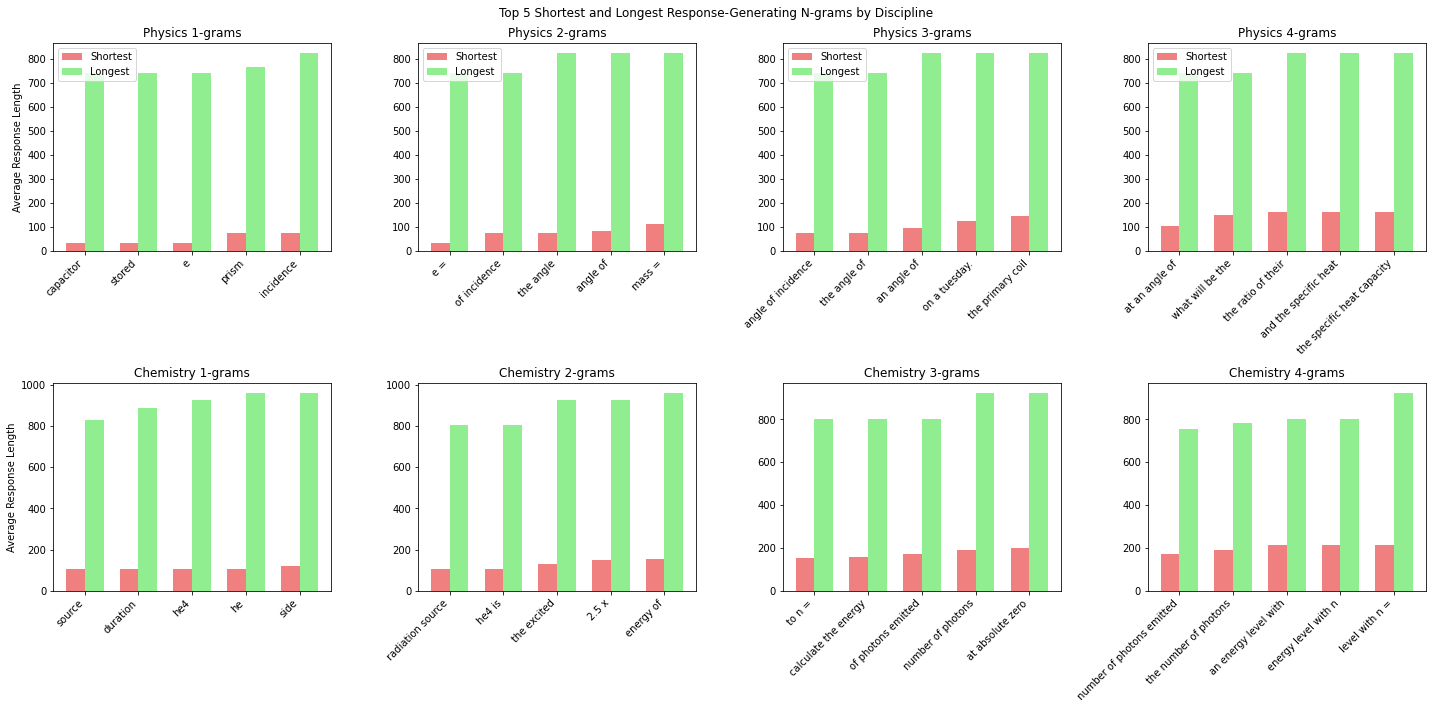

In [64]:
def analyze_keyword_responses(df, n_top=5):
    def get_ngrams(text, n):
        if pd.isna(text):
            return []
        words = str(text).lower().split()
        return list(ngrams(words, n))
    
    def analyze_by_discipline_and_ngram(discipline_df, n):
        ngram_responses = defaultdict(list)
        
        for _, row in discipline_df.iterrows():
            question_ngrams = get_ngrams(row['Question'], n)
            response_length = len(str(row['Response by a top LLM']).split())
            
            for gram in question_ngrams:
                gram_key = ' '.join(gram)
                ngram_responses[gram_key].append(response_length)
        
        ngram_avg = {k: np.mean(v) for k, v in ngram_responses.items() 
                    if len(v) >= 2}  # Only include n-grams that appear multiple times
        
        return ngram_avg

    results = {}
    disciplines = ['Physics', 'Chemistry']
    
    for discipline in disciplines:
        discipline_df = df[df['Discipline'] == discipline]
        discipline_results = {}
        
        for n in range(1, 5):  # 1 to 4-grams
            ngram_avgs = analyze_by_discipline_and_ngram(discipline_df, n)
            
            # Get top and bottom 5
            sorted_ngrams = sorted(ngram_avgs.items(), key=lambda x: x[1])
            shortest = sorted_ngrams[:n_top]
            longest = sorted_ngrams[-n_top:]
            
            discipline_results[f'{n}-gram'] = {
                'shortest': shortest,
                'longest': longest
            }
            
        results[discipline] = discipline_results
    
    # Visualization
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Top 5 Shortest and Longest Response-Generating N-grams by Discipline')
    
    for i, discipline in enumerate(disciplines):
        for j, n in enumerate(range(1, 5)):
            data = results[discipline][f'{n}-gram']
            
            ngrams_short = [x[0] for x in data['shortest']]
            lengths_short = [x[1] for x in data['shortest']]
            ngrams_long = [x[0] for x in data['longest']]
            lengths_long = [x[1] for x in data['longest']]
            
            ax = axes[i, j]
            x = np.arange(n_top)
            width = 0.35
            
            ax.bar(x - width/2, lengths_short, width, label='Shortest', color='lightcoral')
            ax.bar(x + width/2, lengths_long, width, label='Longest', color='lightgreen')
            
            ax.set_title(f'{discipline} {n}-grams')
            ax.set_xticks(x)
            ax.set_xticklabels(ngrams_short, rotation=45, ha='right')
            
            if j == 0:
                ax.set_ylabel('Average Response Length')
            if i == 0:
                ax.legend()
    
    plt.tight_layout()
    return results

results_new = analyze_keyword_responses(initial_data)
